In [43]:
import pandas as pd
df=pd.read_excel('Coke vs Pepsi Twitter Data for NLP 1.xlsx')

In [81]:
# What type of variables we have in the data and how many values do we have
def tell_me_types(df):
    print("Column name - type of variable - number of valid values found\n")
    for col in df.columns:
        df_i = df[pd.notnull(df[col])]
        df_i=df_i.reset_index(drop=True)
        if df_i.shape[0]<1:
            print(str(col)+" only has null values: useless")
            continue
        print(col+", "+str(type(df_i[col][0]))+", "+str(df_i.shape[0])+" values registered")
tell_me_types(df)

Column name - type of variable - number of valid values found

Sound Bite Text, <class 'str'>, 97900 values registered
Ratings and Scores only has null values
Title, <class 'str'>, 39973 values registered
Source Type, <class 'str'>, 97900 values registered
Post Type, <class 'str'>, 97900 values registered
Media Type, <class 'str'>, 97900 values registered
URL, <class 'str'>, 97900 values registered
Domain, <class 'str'>, 97900 values registered
Published Date (GMT+00:00) London, <class 'str'>, 97900 values registered
Author Gender, <class 'str'>, 97900 values registered
Author URL, <class 'str'>, 66116 values registered
Author Name, <class 'str'>, 72880 values registered
Author Handle, <class 'str'>, 50586 values registered
Author ID, <class 'str'>, 56430 values registered
Author Location - Country 1, <class 'str'>, 39935 values registered
Author Location - State/Province 1, <class 'str'>, 8543 values registered
Author Location - City 1, <class 'str'>, 6705 values registered
Author Loc

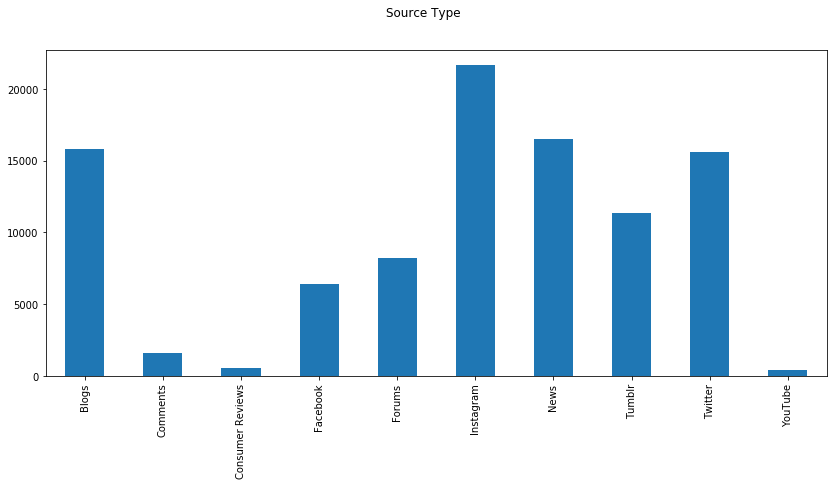

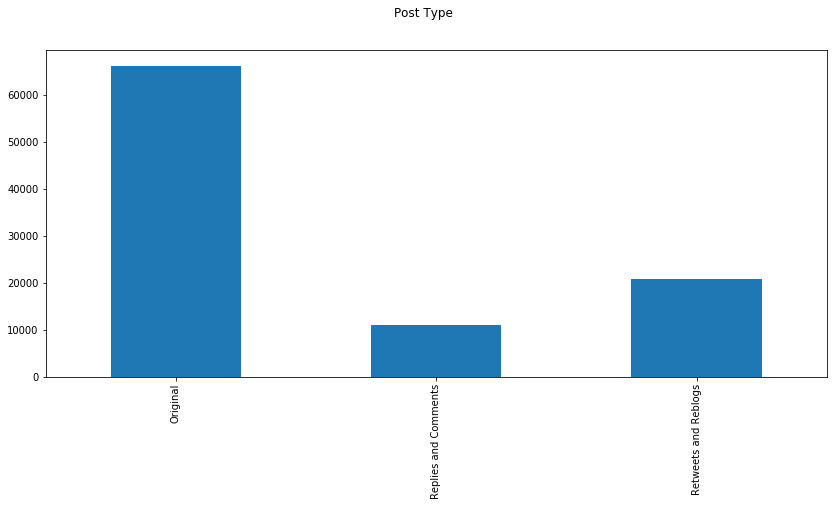

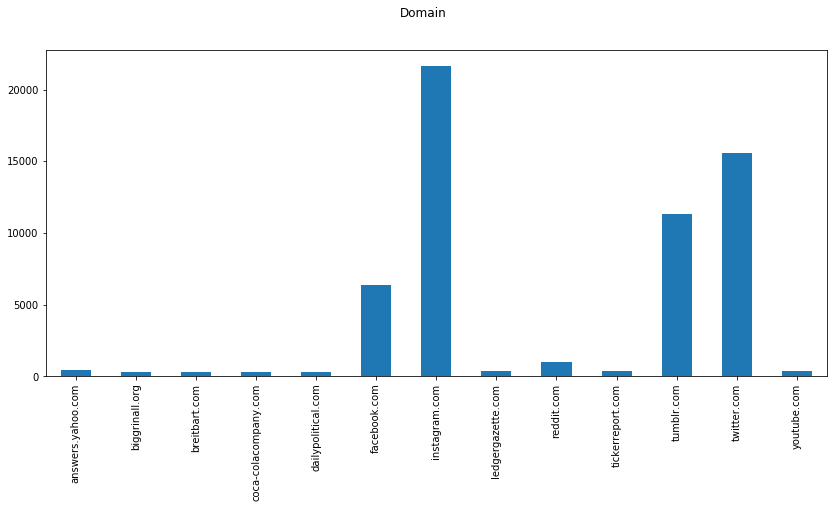

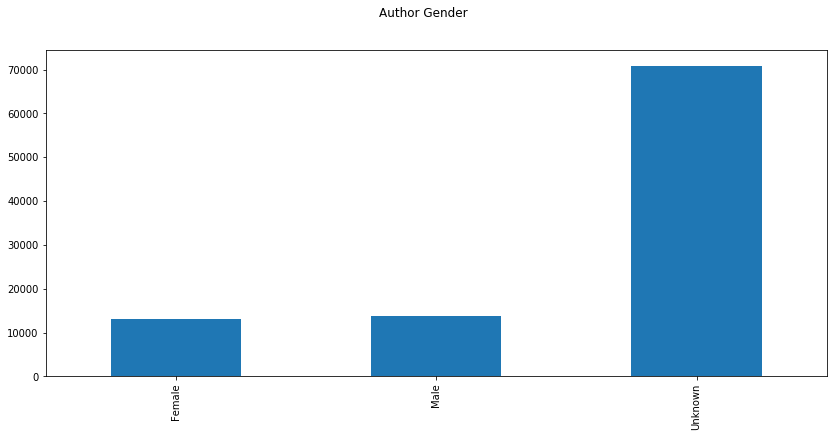

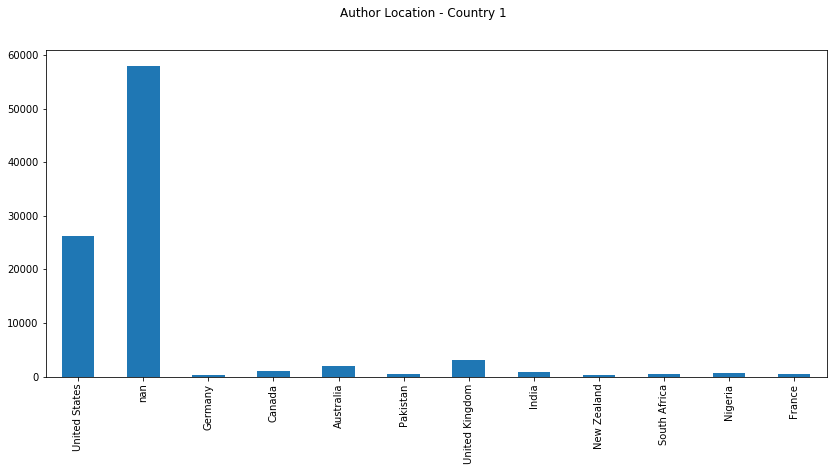

In [104]:
# HISTOGRAM FOR SOURCES
# It is going to be hard to do geographical segmentation, most data seems to come from the US it is less than half
from matplotlib import pyplot
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
Variables_to_plot = ["Source Type", "Post Type","Domain", "Author Gender", "Author Location - Country 1"]
for i in Variables_to_plot:
    string_counts = Counter(df[i]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
    for k in list(string_counts):
        if string_counts[k] < 300:
            del string_counts[k]
    pyplot.figure(figsize=(14, 6))
    pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIES FROM THE LIST
    pyplot.suptitle(i) # GIVES THE MAIN TITLE
    pyplot.show() # DISPLAYS THE FIGURE

In [109]:
# We might look for intraday seasonality in the data

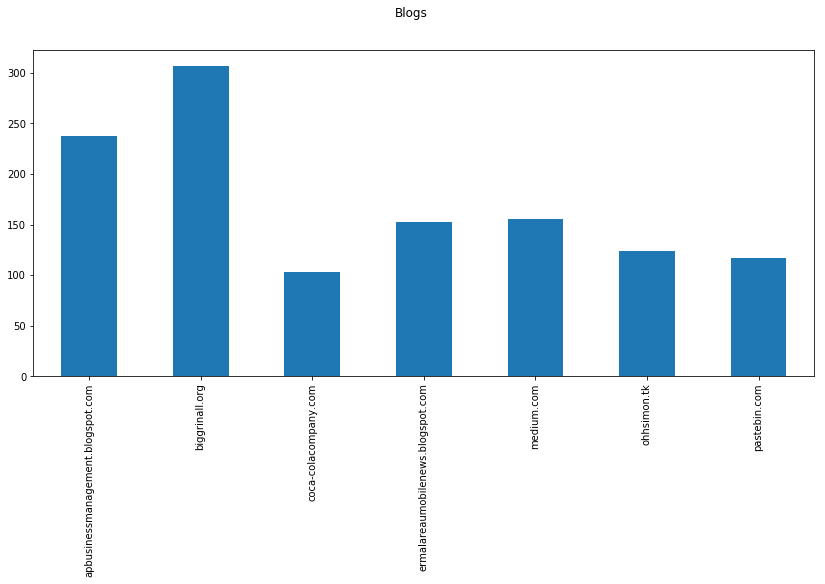

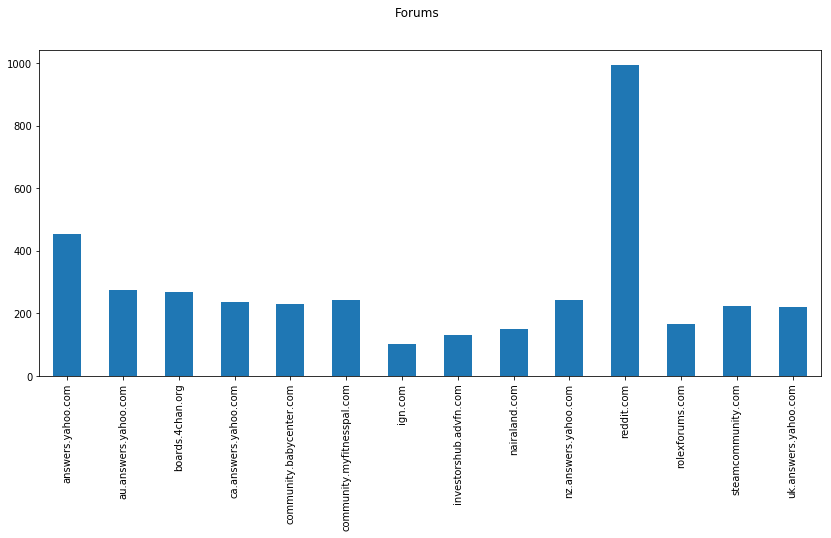

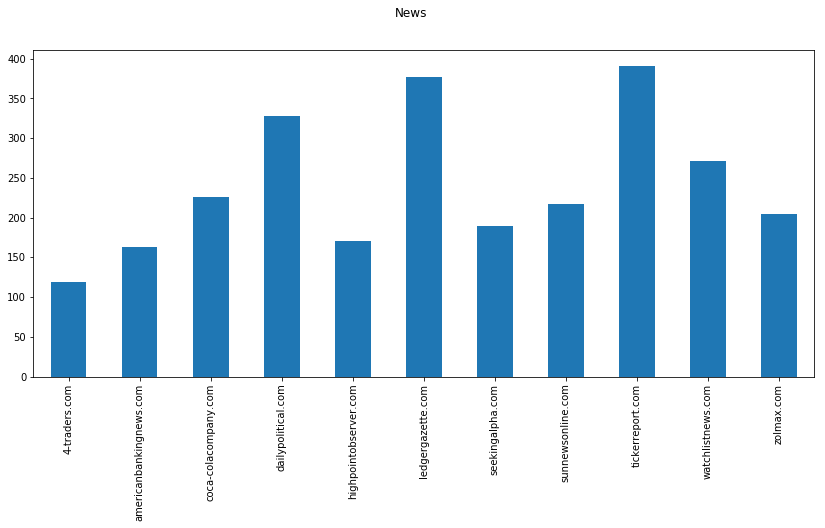

In [108]:
# blogs, forums and news are relevant sources of information but apparently with no common domain
# Should we group blogs, forums and news by category? This might be used to segmentate consumers
# We could extract the SEO tags from the domains and create profiles for conversations
# Results from this sample cannot be extrapolated to a population because the sample was not randomized
# We have to assume conditional probability for the results. IE (People who like videogames rather coke over pepsi)
from matplotlib import pyplot
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
Variables_to_plot = ["Blogs","Forums","News"]
for i in Variables_to_plot:
    df_f = df.loc[df['Source Type'] == i]
    string_counts = Counter(df_f["Domain"]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
    for k in list(string_counts):
        if string_counts[k] < 100:
            del string_counts[k]
    pyplot.figure(figsize=(14, 6))
    pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIES FROM THE LIST
    pyplot.suptitle(i) # GIVES THE MAIN TITLE
    pyplot.show() # DISPLAYS THE FIGURE